# NASA Earthdata Cloud and data access using earthaccess and icepyx
# Part 2: Using the `icepyx` python library to access ICESat-2 data

## Tutorial Overview

This tutorial is designed for the "[Cloud Computing and Open-Source Scientific Software for Cryosphere Communities](https://agu.confex.com/agu/fm23/meetingapp.cgi/Session/193477)" Learning Workshop at the 2023 AGU Fall Meeting.

This notebook demonstrates how to search for, access, and analyse and plot a cloud-hosted ICESat-2 dataset using the [`icepyx`](https://icepyx.readthedocs.io/en/latest/example_notebooks/IS2_data_access.html) package.

<figure>
<center>
    <img src="https://icepyx.readthedocs.io/en/latest/_static/icepyx_v2_oval_orig_nobackgr.png" alt='icepyx logo of the word icepyx in raised letters on an iceberg with an ice ax'/>
</center>
</figure>

icepyx is a community and software library for searching, downloading, and reading ICESat-2 data. While opening data should be straightforward, there are some oddities in navigating the highly nested organization and hundreds of variables of the ICESat-2 data. icepyx provides tools to help with those oddities.

`icepyx` was started and initially developed by Jessica Scheick to provide easy programmatic access to ICESat-2 data (before `earthaccess` existed!) and facilitate collaborative development around ICESat-2 data products, including training, skill building, and support around practicing open science and contributing to open-source software. Thanks to contributions from countless community members, `icepyx` can (for ICESat-2 data): 
- search for available data granules (data files)
- order and download data or access it directly in the cloud
- order a subset of data: clipped in space, time, containing fewer variables, or a few other options provided by NSIDC
- search through the available ICESat-2 data variables
- read ICESat-2 data into xarray DataArrays, including merging data from multiple files

Under the hood, `icepyx` relies on `earthaccess` to help handle authentication, especially for obtaining S3 tokens to access ICESat-2 data in the cloud. All this happens without the user needing to take any action other than supplying their Earthdata Login credentials using one of the methods described in the `earthaccess` tutorial.

In this tutorial we will look at the `ATL08` Land and Vegetation Height product.


### Learning Objectives

In this tutorial you will learn:  
1. how to use `icepyx` to search for ICESat-2 data using spatial and temporal filters;  
2. how to open and combine data multiple HDF5 groups into an `xarray.Dataset` using `icepyx.Read`;  
3. how to begin your analysis, including selecting strong/weak beams and plotting.  

## Prerequisites

The workflow described in this tutorial forms the initial steps of an _Analysis in Place_ workflow that would be run on a AWS cloud compute resource.  You will need:

1. a JupyterHub, such as CryoHub, or AWS EC2 instance in the us-west-2 region.
3. a NASA Earthdata Login.  If you need to register for an Earthdata Login see the [Getting an Earthdata Login](https://icesat-2-2023.hackweek.io/preliminary/checklist/earthdata.html#getting-an-earthdata-login) section of the ICESat-2 Hackweek 2023 Jupyter Book.
4. A `.netrc` file, that contains your Earthdata Login credentials, in your home directory. See [Configure Programmatic Access to NASA Servers](https://icesat-2-2023.hackweek.io/preliminary/checklist/earthdata.html#configure-programmatic-access-to-nasa-servers) to create a `.netrc` file.

## Credits

This notebook is based on an [icepyx Tutorial](https://nasa-openscapes.github.io/2023-ssc/tutorials/data-access/icepyx.html) originally created by Rachel Wegener, Univ. Maryland and updated by Amy Steiker, NSIDC, and Jessica Scheick, Univ. of New Hampshire.

## Using `icepyx` to search and access ICESat-2 data

We won't dive into using icepyx to search for and download data in this tutorial, since we already discussed how to do that with `earthaccess`. The code to search and download is still provided below for the curious reader. The [icepyx documentation](https://icepyx.readthedocs.io/en/latest/example_notebooks/IS2_data_access.html) shows more detail about different search parameters and how to inspect the results of a query.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
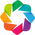

In [1]:
import icepyx as ipx

In [2]:
import json
import math

import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import shape, GeometryCollection

In [3]:
%matplotlib inline

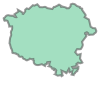

In [7]:
# Open a geojson of our area of interest
with open("./bosque_primavera.json") as f:
    features = json.load(f)["features"]

bosque = GeometryCollection([shape(feature["geometry"]).buffer(0) for feature in features])
bosque

In [8]:
# Use our search parameters to setup a search Query
short_name = 'ATL08'
spatial_extent = list(bosque.bounds)
date_range = ['2019-05-04','2019-05-04']
region = ipx.Query(short_name, spatial_extent, date_range)

In [11]:
# Display if any data files, or granules, matched our search
region.avail_granules(ids=True)

[['ATL08_20190504124152_05540301_006_02.h5']]

In [12]:
# We can also get the S3 urls
region.avail_granules(ids=True, cloud=True)

[['ATL08_20190504124152_05540301_006_02.h5'],
 ['s3://nsidc-cumulus-prod-protected/ATLAS/ATL08/006/2019/05/04/ATL08_20190504124152_05540301_006_02.h5']]

In [13]:
# Download the granules to a into a folder called 'bosque_primavera_ATL08'
region.download_granules('./bosque_primavera_ATL08')

Enter your Earthdata Login username:  amy.steiker
Enter your Earthdata password:  ········


Total number of data order requests is  1  for  1  granules.
Data request  1  of  1  is submitting to NSIDC
order ID:  5000004735271
Initial status of your order request at NSIDC is:  processing
Your order status is still  processing  at NSIDC. Please continue waiting... this may take a few moments.
Your order is: complete
Beginning download of zipped output...
Data request 5000004735271 of  1  order(s) is downloaded.
Download complete


<div class="alert alert-block alert-info">
<b>Tip:</b> If you don't want to type your Earthdata Login information every time they are
    required you can setup more automatic methods of authentication. Two common methods
    are 1) Add your earthdata password and username to as environment variables
    as EARTHDATA_USERNAME and EARTHDATA_PASSWORD. 2) setup a .netrc file in your home directory. See <a href="https://nasa-openscapes.github.io/2021-Cloud-Hackathon/tutorials/04_NASA_Earthdata_Authentication.html"> the Openscapes tutorial</a> </div>

## Reading a file with icepyx

To read a file with icepyx there are several steps:
1. Create a `Read` object. This sets up an initial connection to your file(s) and validates the metadata.
2. Tell the `Read` object what variables you would like to read
3. Load your data!

### Create a `Read` object

Here we are creating a read object to set up an initial connection to your file(s). The pattern outlines the file naming convention. For example, `{revision:2}` describes the last two values in the filename which denote the product revision number. Details on the filenaming convention are found [here](https://nsidc.org/sites/default/files/documents/user-guide/atl08-v006-userguide.pdf). 

In [14]:
pattern = "processed_ATL{product:2}_{datetime:%Y%m%d%H%M%S}_{rgt:4}{cycle:2}{orbitsegment:2}_{version:3}_{revision:2}.h5"
reader = ipx.Read('./bosque_primavera_ATL08', "ATL08", pattern)

You have 1 files matching the filename pattern to be read in.


In [15]:
reader

### Select your variables

To view the variables contained in your dataset you can call `.vars` on your data reader.

In [16]:
reader.vars.avail()

['ancillary_data/atlas_sdp_gps_epoch',
 'ancillary_data/control',
 'ancillary_data/data_end_utc',
 'ancillary_data/data_start_utc',
 'ancillary_data/end_cycle',
 'ancillary_data/end_delta_time',
 'ancillary_data/end_geoseg',
 'ancillary_data/end_gpssow',
 'ancillary_data/end_gpsweek',
 'ancillary_data/end_orbit',
 'ancillary_data/end_region',
 'ancillary_data/end_rgt',
 'ancillary_data/granule_end_utc',
 'ancillary_data/granule_start_utc',
 'ancillary_data/land/atl08_region',
 'ancillary_data/land/bin_size_h',
 'ancillary_data/land/bin_size_n',
 'ancillary_data/land/bright_thresh',
 'ancillary_data/land/ca_class',
 'ancillary_data/land/can_noise_thresh',
 'ancillary_data/land/can_stat_thresh',
 'ancillary_data/land/canopy20m_thresh',
 'ancillary_data/land/canopy_flag_switch',
 'ancillary_data/land/canopy_seg',
 'ancillary_data/land/class_thresh',
 'ancillary_data/land/cloud_filter_switch',
 'ancillary_data/land/del_amp',
 'ancillary_data/land/del_mu',
 'ancillary_data/land/del_sigma',


Thats **a lot** of variables!

One key feature of icepyx is the ability to browse the variables available in the dataset. There are typically hundreds of variables in a single dataset, so that is a lot to sort through! Let's take a moment to get oriented to the organization of ATL08 variables, by first a few important pieces of the algorithm.

To create higher level variables like canopy or terrain height, the ATL08 algorithms goes through a series of steps:
1. Identify signal photons from noise photons
2. Classify each of the signal photons as either terrain, canopy, or canopy top
3. Remove elevation, so the heights are with respect to the ground
3. Group the signal photons into 100m segments. If there are a sufficient number of photons in that group, calculate statistics for terrain and canopy (ex. mean height, max height, standard deviation, etc.)


<img src="https://nasa-openscapes.github.io/2023-ssc/tutorials/data-access/.images/ATL08_photon_classification_example.jpg" width=450/>

> _Fig. 4. An example of the classified photons produced from the ATL08 algorithm. Ground photons (red dots) are labeled as all photons falling within a point spread function distance of the estimated ground surface. The top of canopy photons (green dots) are photons that fall within a buffer distance from the upper canopy surface, and the photons that lie between the top of canopy surface and ground surface are labeled as canopy photons (blue dots)._ (Neuenschwander & Pitts, 2019)

Providing all the potentially useful information from all these processing steps results in a data file that looks like:

<img src="https://nasa-openscapes.github.io/2023-ssc/tutorials/data-access/.images/ATL08_structure.png" width=650/>

Another way to visualize these structure is to download one file and open it using https://myhdf5.hdfgroup.org/. 

Further information about each one of the variables is available in the [Algorithm Theoretical Basis Document (ATBD)](https://icesat-2.gsfc.nasa.gov/sites/default/files/page_files/ICESat2_ATL08_ATBD_r006.pdf) for ATL08.

There is lots to explore in these variables, but we will move forward using a common ATL08 variable: `h_canopy`, or the "98% height of all the individual relative canopy heights (height above terrain)" (ATBD definition).

In [17]:
reader.vars.append(var_list=['h_canopy', 'latitude', 'longitude'])

Note that adding variables is a required step before you can load the data.

### Load the data!

In [18]:
ds = reader.load()
ds

/srv/conda/envs/notebook/lib/python3.10/site-packages/icepyx/core/read.py:520: UserWarning: rename 'delta_time' to 'photon_idx' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  .rename({"delta_time": "photon_idx"})
/srv/conda/envs/notebook/lib/python3.10/site-packages/icepyx/core/read.py:520: UserWarning: rename 'delta_time' to 'photon_idx' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  .rename({"delta_time": "photon_idx"})


<xarray.Dataset>
Dimensions:              (gran_idx: 1, photon_idx: 211, spot: 2)
Coordinates:
  * gran_idx             (gran_idx) float64 5.54e+04
  * photon_idx           (photon_idx) int64 0 1 2 3 4 5 ... 206 207 208 209 210
  * spot                 (spot) uint8 1 2
    source_file          (gran_idx) <U74 './bosque_primavera_ATL08/processed_...
    delta_time           (photon_idx) datetime64[ns] 2019-05-04T12:47:13.5766...
Data variables:
    sc_orient            (gran_idx) int8 0
    cycle_number         (gran_idx) int8 3
    rgt                  (gran_idx, spot, photon_idx) float32 554.0 ... 554.0
    atlas_sdp_gps_epoch  (gran_idx) datetime64[ns] 2018-01-01T00:00:18
    data_start_utc       (gran_idx) datetime64[ns] 2019-05-04T12:46:31.876322
    data_end_utc         (gran_idx) datetime64[ns] 2019-05-04T12:48:54.200826
    latitude             (spot, gran_idx, photon_idx) float32 20.59 ... 20.73
    longitude            (spot, gran_idx, photon_idx) float32 -103.7 ... -103.7
    gt                   (gran_idx, spot) object 'gt3l' 'gt3r'
    h_canopy             (photon_idx) float32 12.12 4.747 11.83 ... nan nan nan
Attributes:
    data_product:  ATL08
    Description:   Contains data categorized as land at 100 meter intervals.
    data_rate:     Data are stored as aggregates of 100 meters.

Here we have an xarray Dataset, a common Python data structure for analysis. To visualize the data we can plot it using:

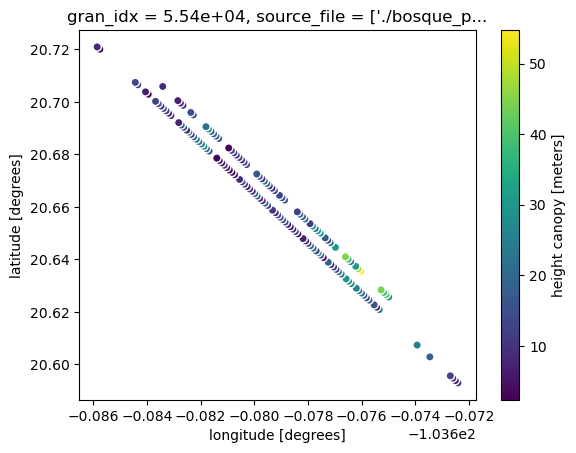

In [21]:
ds.plot.scatter(x="longitude", y="latitude", hue="h_canopy")

Notice also that the data is shown for just our area of interest! That is because of icepyx's subsetting feature. You can find more details on this feature in the icepyx example gallery [here](https://icepyx.readthedocs.io/en/latest/example_notebooks/IS2_data_access2-subsetting.html). 

## When to Cloud

The astute user has by now noticed that in this tutorial we downloaded a granule to read in rather than directly reading it from an S3 bucket. Recall from the previous tutorial that reading a single group was a time intensive step and did not include multiple groups. Due to the way ICESat-2 data is stored on disk (because of the file format - it doesn't matter if it's a local disk or cloud disk), accessing the data within the file is really slow via the virtual file system. Several efforts are under way to help address this issue, and icepyx will implement them as soon as they are available. Current efforts include:
- storing ICESat-2 data in a cloud-optimized format
- reading data using the [h5coro](https://github.com/ICESat2-SlideRule/h5coro) library

Please let Amy, Jessica, or one of the workshop leads know if you're interested in joining any of these conversations (or telling us what issues you've encountered). We'd love to have your input and use case!

## Some example plots

To close, here are a few more examples of reading and visualizing ATL08 data.

### Example 1: View the photon classifications

In [22]:
# Set up the data reader
pattern = "processed_ATL{product:2}_{datetime:%Y%m%d%H%M%S}_{rgt:4}{cycle:2}{orbitsegment:2}_{version:3}_{revision:2}.h5"
reader = ipx.Read('./bosque_primavera_ATL08', "ATL08", pattern)

You have 1 files matching the filename pattern to be read in.


In [23]:
# Add the photon height and classification variables
reader.vars.append(var_list=['ph_h', 'classed_pc_flag', 'latitude', 'longitude'])

In [24]:
# load the dataset
ds_photons = reader.load()
ds_photons

/srv/conda/envs/notebook/lib/python3.10/site-packages/icepyx/core/read.py:520: UserWarning: rename 'delta_time' to 'photon_idx' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  .rename({"delta_time": "photon_idx"})
/srv/conda/envs/notebook/lib/python3.10/site-packages/icepyx/core/read.py:520: UserWarning: rename 'delta_time' to 'photon_idx' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  .rename({"delta_time": "photon_idx"})
/srv/conda/envs/notebook/lib/python3.10/site-packages/icepyx/core/read.py:520: UserWarning: rename 'delta_time' to 'photon_idx' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  .rename({"delta_time": "photon_idx"})
/srv/conda/envs/notebook/lib/python3.10/site-packages/icepyx/core/read.py:520: UserWarning: rename 'delta_time' to 'photo

<xarray.Dataset>
Dimensions:              (gran_idx: 1, photon_idx: 25234, spot: 2)
Coordinates:
  * gran_idx             (gran_idx) float64 5.54e+04
  * photon_idx           (photon_idx) int64 0 1 2 3 ... 25230 25231 25232 25233
  * spot                 (spot) uint8 1 2
    source_file          (gran_idx) <U74 './bosque_primavera_ATL08/processed_...
    delta_time           (photon_idx) datetime64[ns] 2019-05-04T12:47:13.5766...
Data variables:
    sc_orient            (gran_idx) int8 0
    cycle_number         (gran_idx) int8 3
    rgt                  (gran_idx, spot, photon_idx) float32 554.0 ... nan
    atlas_sdp_gps_epoch  (gran_idx) datetime64[ns] 2018-01-01T00:00:18
    data_start_utc       (gran_idx) datetime64[ns] 2019-05-04T12:46:31.876322
    data_end_utc         (gran_idx) datetime64[ns] 2019-05-04T12:48:54.200826
    latitude             (spot, gran_idx, photon_idx) float32 20.59 ... nan
    longitude            (spot, gran_idx, photon_idx) float32 -103.7 ... nan
    gt                   (gran_idx, spot) <U4 'gt3l' 'gt3r'
    ph_h                 (spot, gran_idx, photon_idx) float32 nan ... 0.05542
    classed_pc_flag      (spot, gran_idx, photon_idx) float32 nan nan ... 1.0
Attributes:
    data_product:  ATL08

In [25]:
# Select just one beam
gt1l = ds_photons.sel(spot=1)

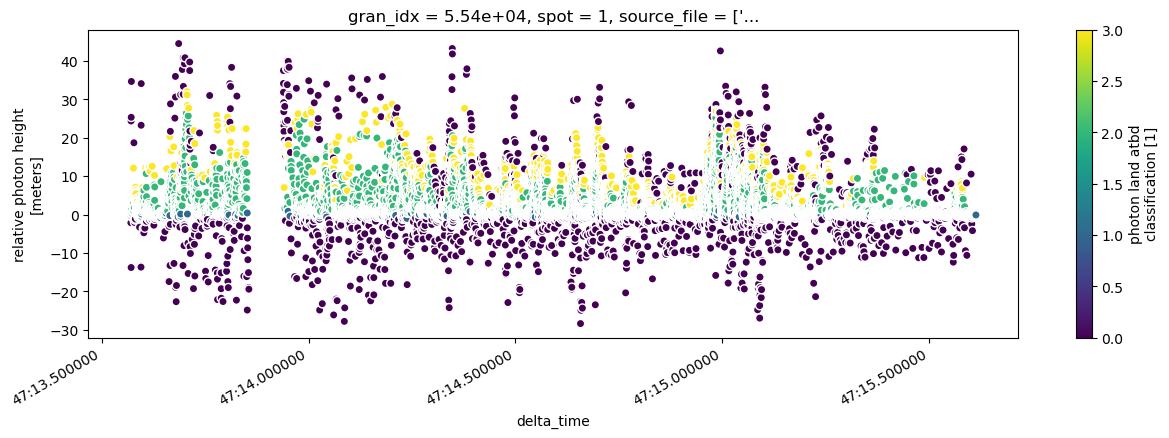

In [26]:
# A less complex plot
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
    
gt1l.plot.scatter(ax=ax, x='delta_time', y='ph_h', hue='classed_pc_flag')

Text(0, 0.5, 'Height above the ground (m)')

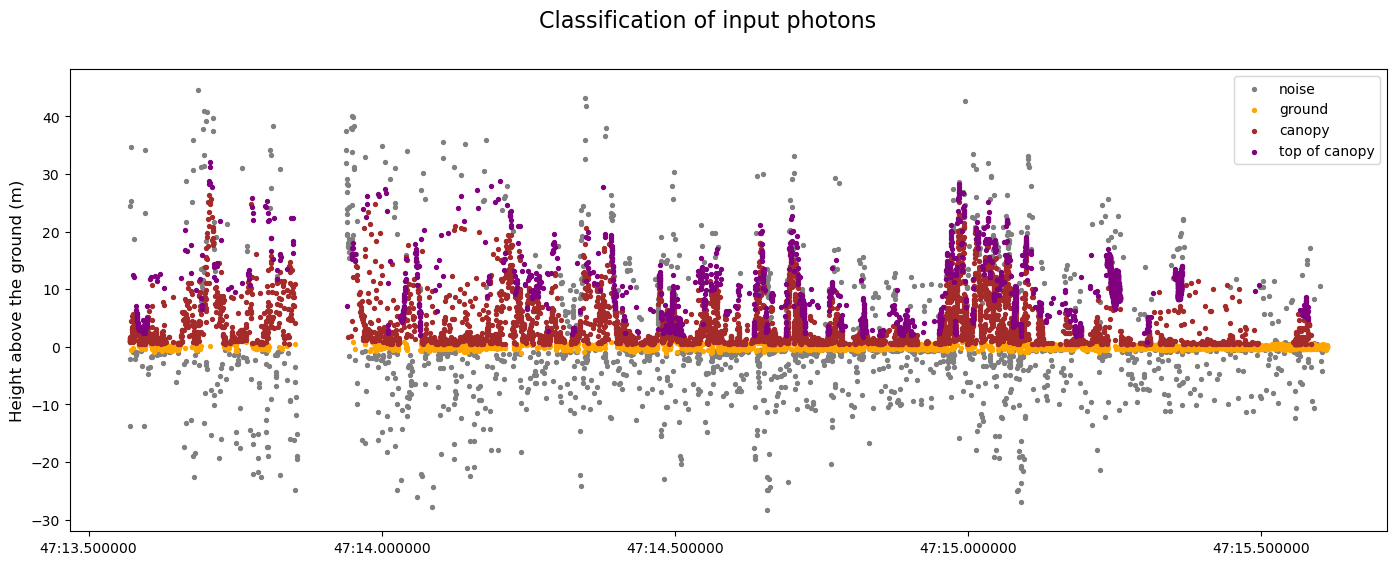

In [32]:
# A plot with more customization
fig, ax = plt.subplots()
fig.set_size_inches(17, 6)
fig.suptitle('Classification of input photons', size=16)

labels={0: 'noise', 1: 'ground', 2: 'canopy', 3: 'top of canopy'}
colors={0: 'grey', 1: 'orange', 2: 'brown', 3: 'purple'}

for g in np.unique(gt1l.classed_pc_flag[0]):
    if not math.isnan(g):
        ds_group = gt1l.where(gt1l.classed_pc_flag == g, drop=True)
        ax.scatter(x=ds_group.delta_time, y=ds_group.ph_h, c=colors[g], 
                   label=labels[g], s=8)
ax.legend()

ax.set_ylabel('Height above the ground (m)', size=12)


### Plot the canopy compared to the ground height

In [33]:
# Remove our previous variables
reader.vars.remove(all=True)
# Add the next set of variables to the list
reader.vars.append(var_list=['h_te_best_fit', 'latitude', 'longitude'])

In [34]:
# load the data
ds_te = reader.load()
ds_te

/srv/conda/envs/notebook/lib/python3.10/site-packages/icepyx/core/read.py:520: UserWarning: rename 'delta_time' to 'photon_idx' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  .rename({"delta_time": "photon_idx"})
/srv/conda/envs/notebook/lib/python3.10/site-packages/icepyx/core/read.py:520: UserWarning: rename 'delta_time' to 'photon_idx' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  .rename({"delta_time": "photon_idx"})


<xarray.Dataset>
Dimensions:              (gran_idx: 1, photon_idx: 211, spot: 2)
Coordinates:
  * gran_idx             (gran_idx) float64 5.54e+04
  * photon_idx           (photon_idx) int64 0 1 2 3 4 5 ... 206 207 208 209 210
  * spot                 (spot) uint8 1 2
    source_file          (gran_idx) <U74 './bosque_primavera_ATL08/processed_...
    delta_time           (photon_idx) datetime64[ns] 2019-05-04T12:47:13.5766...
Data variables:
    sc_orient            (gran_idx) int8 0
    cycle_number         (gran_idx) int8 3
    rgt                  (gran_idx, spot, photon_idx) float32 554.0 ... 554.0
    atlas_sdp_gps_epoch  (gran_idx) datetime64[ns] 2018-01-01T00:00:18
    data_start_utc       (gran_idx) datetime64[ns] 2019-05-04T12:46:31.876322
    data_end_utc         (gran_idx) datetime64[ns] 2019-05-04T12:48:54.200826
    latitude             (spot, gran_idx, photon_idx) float32 20.59 ... 20.73
    longitude            (spot, gran_idx, photon_idx) float32 -103.7 ... -103.7
    gt                   (gran_idx, spot) object 'gt3l' 'gt3r'
    h_te_best_fit        (photon_idx) float32 1.342e+03 1.34e+03 ... 1.381e+03
Attributes:
    data_product:  ATL08
    Description:   Contains data categorized as land at 100 meter intervals.
    data_rate:     Data are stored as aggregates of 100 meters.

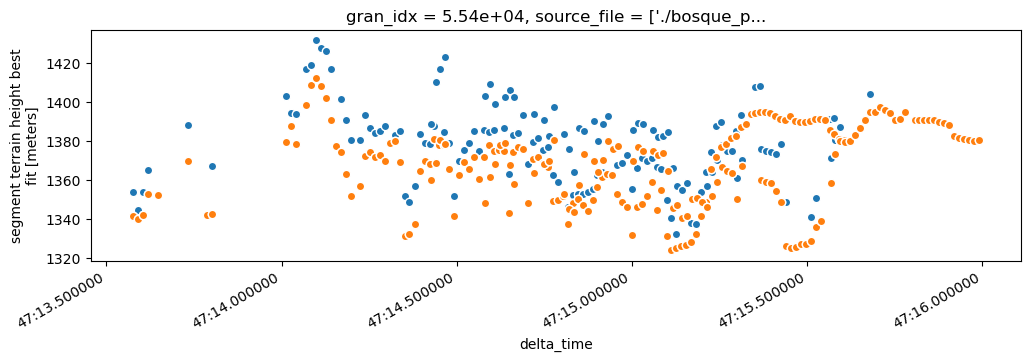

In [35]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 3)

# plot the canopy height above ground level
(ds.h_canopy + ds_te.h_te_best_fit).plot.scatter(ax=ax, x="delta_time", y="h_canopy") # orange

# plot the terrain values
ds_te.plot.scatter(ax=ax, x="delta_time", y="h_te_best_fit") # blue

## Summary 

In this notebook we explored the opening and rendering ATL08 data with icepyx. We saw that icepyx will subset our downloaded data to our area of interest and also allows us to download only the variables we need. The ATL08 data has a folder-like structure with many variables to choose from. We focused on `h_canopy` and showed additional examples using the raw photons and `h_te_best_fit` for the ground height.

More information about ATL08 or icepyx can be found in:
- The [icepyx documentation](https://icepyx.readthedocs.io/en/latest/)
- The [Algorithm Theoretical Basis Document (ATBD)](https://icesat-2.gsfc.nasa.gov/sites/default/files/page_files/ICESat2_ATL08_ATBD_r006.pdf)
- Neuenschwander et. al. 2019, Remote Sens. Env. [DOI](https://doi.org/10.1016/j.rse.2018.11.005)